## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
import matplotlib as mpl 
import matplotlib.cm as cm 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.cluster import KMeans


warnings.filterwarnings('ignore')
%matplotlib inline

# Exporting datasets

In [2]:
# Get the data 
wisconsion= pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',header=None)
wisconsion.columns=["Id","Clump Thickness","Uniformity of Cell Size","Uniformity of Cell Shape","Marginal Adhesion","Single Epithelial Cell Size","Bare Nuclei",
           " Bland Chromatin","Normal Nucleoli","Mitoses","Class"]

hepatitis=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data",header=None)
hepatitis.columns=['Class','AGE','SEX','STERIO','ANTIVIRALS',"FATIGUE","MALAISE",'ANOREXIA','LIVER BIG','LIVER FIRM',
             'SPLEEN PALPABLE','SPIDERS','ASCITES','VARICES','BILIRUBIN','ALK PHOSPHATE','SGOT','ALBUMIN','PROTIME','HISTOLOGY']

ILPD=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00225/Indian%20Liver%20Patient%20Dataset%20(ILPD).csv",header=None)
ILPD.columns=["age","sex","TB","DB","Alkphos","Sgpt","Sgot","TP","ALB","A/G","class"]

Immunotherapy=pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00428/Immunotherapy.xlsx")

parkinsons=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data")

# Data Cleaning and preprocessing

In [3]:
# Data Preprocessing
#1- wisconsion Datasetsm
wisconsion.replace("?",np.nan,inplace=True)
wisconsion["Bare Nuclei"]=wisconsion["Bare Nuclei"].astype('float64')
wisconsion["Bare Nuclei"].fillna(wisconsion.groupby(["Class"])["Bare Nuclei"].transform(np.median),inplace=True)
wisconsion["Class"]=wisconsion["Class"].replace({2:1,4:0})
wisconsion.drop(["Id"],1,inplace=True)

#2- Indian Liver patients datasets
ILPD.replace("?",np.nan,inplace=True)
ILPD["A/G"].fillna(ILPD.groupby(["class","sex"])["A/G"].transform(np.median),inplace=True)
ILPD["sex"]=ILPD["sex"].replace({"Female":1,"Male":0})
ILPD["class"]=ILPD["class"].replace({2:0})

#3-Immunotherapy
Immunotherapy.replace("?",np.nan,inplace=True)
Immunotherapy.isna().sum()
Immunotherapy["sex"]=Immunotherapy["sex"].astype("object")
Immunotherapy["sex"]=Immunotherapy["sex"].replace({2:0})

#4-parkinsons
parkinsons.replace("?",np.nan,inplace=True)
parkinsons["status"]=parkinsons["status"].astype("object")
parkinsons.drop(["name"],1,inplace=True)


In [4]:
#5-hepatitis
hepatitis.replace("?",np.nan,inplace=True)
hepatitis["Class"]=hepatitis["Class"].astype("object")
hepatitis["SEX"]=hepatitis["SEX"].astype("object")
hepatitis["ANTIVIRALS"]=hepatitis["ANTIVIRALS"].astype("object")


In [5]:
hepatitis.STERIO.fillna(hepatitis.STERIO.value_counts().index[0],inplace=True)
hepatitis.FATIGUE.fillna(hepatitis.FATIGUE.value_counts().index[0],inplace=True)
hepatitis.MALAISE.fillna(hepatitis.MALAISE.value_counts().index[0],inplace=True)
hepatitis.ANOREXIA.fillna(hepatitis.ANOREXIA.value_counts().index[0],inplace=True)
hepatitis["LIVER BIG"].fillna(hepatitis["LIVER BIG"].value_counts().index[0],inplace=True)
hepatitis["LIVER FIRM"].fillna(hepatitis["LIVER FIRM"].value_counts().index[0],inplace=True)
hepatitis["SPLEEN PALPABLE"].fillna(hepatitis["SPLEEN PALPABLE"].value_counts().index[0],inplace=True)
hepatitis.SPIDERS.fillna(hepatitis.SPIDERS.value_counts().index[0],inplace=True)
hepatitis.ASCITES.fillna(hepatitis.ASCITES.value_counts().index[0],inplace=True)
hepatitis.VARICES.fillna(hepatitis.VARICES.value_counts().index[0],inplace=True)
hepatitis.BILIRUBIN.fillna(hepatitis.BILIRUBIN.value_counts().index[0],inplace=True)
hepatitis.SGOT.fillna(hepatitis.SGOT.value_counts().index[0],inplace=True)
hepatitis.ALBUMIN.fillna(hepatitis.ALBUMIN.value_counts().index[0],inplace=True)
hepatitis["ALK PHOSPHATE"].fillna(hepatitis["ALK PHOSPHATE"].value_counts().index[0],inplace=True)
hepatitis.drop(columns=["PROTIME"],inplace=True)

hepatitis["SEX"]=hepatitis["SEX"].replace({2:0})
hepatitis["STERIO"]=hepatitis["STERIO"].replace({"2":"0"})
hepatitis["FATIGUE"]=hepatitis["FATIGUE"].replace({"2":"0"})
hepatitis["MALAISE"]=hepatitis["MALAISE"].replace({"2":"0"})
hepatitis["ANTIVIRALS"]=hepatitis["ANTIVIRALS"].replace({2:0})
hepatitis["ANOREXIA"]=hepatitis["ANOREXIA"].replace({"2":"0"})
hepatitis["LIVER BIG"]=hepatitis["LIVER BIG"].replace({"2":"0"})
hepatitis["LIVER FIRM"]=hepatitis["LIVER FIRM"].replace({"2":"0"})
hepatitis["SPLEEN PALPABLE"]=hepatitis["SPLEEN PALPABLE"].replace({"2":"0"})
hepatitis["SPIDERS"]=hepatitis["SPIDERS"].replace({"2":"0"})
hepatitis["ASCITES"]=hepatitis["ASCITES"].replace({"2":"0"})
hepatitis["VARICES"]=hepatitis["VARICES"].replace({"2":"0"})
hepatitis["HISTOLOGY"]=hepatitis["HISTOLOGY"].replace({2:0})
hepatitis["Class"]=hepatitis["Class"].replace({1:0,2:1})

In [6]:
wisconsion.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,1
1,5,4,4,5,7,10.0,3,2,1,1
2,3,1,1,1,2,2.0,3,1,1,1
3,6,8,8,1,3,4.0,3,7,1,1
4,4,1,1,3,2,1.0,3,1,1,1


In [7]:
hepatitis.head()

,Class,AGE,SEX,STERIO,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,HISTOLOGY
0,1,30,0,1,0,0,0,0,1,0,0,0,0,0,1.00,85,18,4.0,1
1,1,50,1,1,0,1,0,0,1,0,0,0,0,0,0.90,135,42,3.5,1
2,1,78,1,0,0,1,0,0,0,0,0,0,0,0,0.70,96,32,4.0,1
3,1,31,1,0,1,0,0,0,0,0,0,0,0,0,0.70,46,52,4.0,1
4,1,34,1,0,0,0,0,0,0,0,0,0,0,0,1.00,85,200,4.0,1


In [8]:
ILPD.head()

,age,sex,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G,class
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [9]:
Immunotherapy.head()

,sex,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,22,2.25,14,3,51,50,1
1,1,15,3.00,2,3,900,70,1
2,1,16,10.50,2,1,100,25,1
3,1,27,4.50,9,3,80,30,1
4,1,20,8.00,6,1,45,8,1


In [10]:
parkinsons.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


# define necessary functions

In [11]:
# Function to normalize continous variable in datasets
def normalize(df,cols):
    for col in cols:
        df[col]=(df[col]-df[col].min())/(df[col].max()-df[col].min())
    return df

# Plot the target variable for data before and after clustering
def ploting(df,tar_1,tar_2):
    plt.subplot(1,2,1)
    ax1=sns.countplot(x=tar_1,data=df)
    
    plt.subplot(1,2,2)
    ax2=sns.countplot(x=tar_2,data=df)
    plt.show()
    

# Elbow method to find number of clusters for data
def elbow_clusters(df):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(df)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, 11), wcss)
    plt.title("Elbow method")
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()
    

# Generate clusters in dataframe based on Elbow method
def clusters(df,n):
    #get the clusters for positive cases
    clusters_model=KMeans(n_clusters=n)
    clusters_model.fit(df)
    df["labels"]=clusters_model.predict(df)
    df["labels"]=df["labels"]+1
    
    return df

# Modeling Before clustering

In [12]:
models=[]
models.append(("LR",LogisticRegression()))
models.append(("LDA",LinearDiscriminantAnalysis()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("CART",DecisionTreeClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("NB",GaussianNB()))
models.append(("SVM",SVC()))

accuracy=[]
precision=[]
recall=[]
f1=[]

avg_accuracy=[]
avg_precision=[]
avg_rcall=[]
avg_f1=[]

# Find the evaluation metrices for each classification algorithem
def accuracy_metrices(df,tar_1):
    for name,model in models:
        for i in range(10):
            random.seed(i)
            X_train, X_test, y_train, y_test = train_test_split(df.drop([tar_1], 1), df[tar_1], test_size = .2) #split the data    
            model.fit(X_train, y_train)
            predicted = model.predict(X_test)
            accuracy.append(sum(predicted==y_test)/len(predicted))
            precision.append(precision_score(y_test, predicted,average="binary"))
            recall.append(recall_score(y_test, predicted,average="binary"))
            f1.append(f1_score(y_test, predicted,average="binary"))

        avg_accuracy.append((name,sum(accuracy)/len(accuracy)))
        avg_precision.append((name,sum(precision)/len(precision)))
        avg_rcall.append((name,sum(recall)/len(recall)))
        avg_f1.append((name,sum(f1)/len(f1)))
            

In [13]:
dfs=[(wisconsion,"Class"),(hepatitis,"Class"),(ILPD,"class"),(Immunotherapy,"Result_of_Treatment")]
for df,name in dfs:
    accuracy_metrices(df,name)
    
metrices=pd.concat([pd.DataFrame(avg_accuracy),pd.DataFrame(avg_precision)[1],pd.DataFrame(avg_rcall)[1],pd.DataFrame(avg_f1)[1]],1)
metrices.columns=['model','accuracy','precision','recall','f1']  

In [14]:
metrices.head()

,model,accuracy,precision,recall,f1
0,LR,0.966429,0.967353,0.981124,0.974071
1,LDA,0.964643,0.963273,0.982658,0.972707
2,KNN,0.967619,0.968616,0.981940,0.975047
3,CART,0.961071,0.963532,0.978185,0.970593
4,RF,0.962714,0.967754,0.976251,0.971756


# Modeling after clustering

## Normalization

In [15]:
wisconsion= normalize(wisconsion,wisconsion.columns)

wisconsion.head()


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.0,1.0
1,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.0,1.0
2,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.0,1.0
3,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.0,1.0
4,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.0,1.0


In [16]:
ILPD=normalize(ILPD,ILPD.columns)
ILPD.head()

,age,sex,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G,class
0,0.709302,1.0,0.004021,0.000000,0.060576,0.003015,0.001626,0.594203,0.521739,0.240,1.0
1,0.674419,0.0,0.140751,0.275510,0.310699,0.027136,0.018296,0.695652,0.500000,0.176,1.0
2,0.674419,0.0,0.092493,0.204082,0.208598,0.025126,0.011791,0.623188,0.521739,0.236,1.0
3,0.627907,0.0,0.008043,0.015306,0.058134,0.002010,0.002033,0.594203,0.543478,0.280,1.0
4,0.790698,0.0,0.046917,0.096939,0.064485,0.008543,0.009961,0.666667,0.326087,0.040,1.0


In [17]:
parkinsons=normalize(parkinsons,parkinsons.columns)
parkinsons.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,0.184308,0.112592,0.054815,0.195680,0.249012,0.145472,0.247588,0.145288,0.312215,0.280197,...,0.332584,0.068307,0.511745,1,0.369155,0.960148,0.569875,0.585765,0.390661,0.497310
1,0.198327,0.094930,0.278323,0.254130,0.288538,0.191233,0.323687,0.191042,0.472887,0.444536,...,0.516048,0.059331,0.432577,1,0.470830,0.977024,0.703277,0.741337,0.473145,0.671326
2,0.165039,0.059128,0.265288,0.280178,0.328063,0.229287,0.369239,0.229411,0.390634,0.326212,...,0.443317,0.039596,0.496220,1,0.404416,1.000000,0.636745,0.686371,0.408819,0.596682
3,0.165004,0.072927,0.264200,0.263342,0.328063,0.209056,0.324759,0.208862,0.414278,0.354971,...,0.475478,0.040997,0.495936,1,0.416255,0.975885,0.695627,0.738089,0.436977,0.671949
4,0.161150,0.080909,0.260107,0.354511,0.407115,0.282755,0.437299,0.282870,0.499452,0.410025,...,0.584542,0.054174,0.455499,1,0.375159,0.992813,0.762472,0.513798,0.404336,0.757611


In [18]:
Immunotherapy=normalize(Immunotherapy,Immunotherapy.columns)
Immunotherapy.head()

,sex,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1.0,0.170732,0.113636,0.722222,1.0,0.050336,0.705882,1.0
1,1.0,0.000000,0.181818,0.055556,1.0,1.000000,1.000000,1.0
2,1.0,0.024390,0.863636,0.055556,0.0,0.105145,0.338235,1.0
3,1.0,0.292683,0.318182,0.444444,1.0,0.082774,0.411765,1.0
4,1.0,0.121951,0.636364,0.277778,0.0,0.043624,0.088235,1.0


In [19]:
cont=["AGE","BILIRUBIN","ALK PHOSPHATE","SGOT","ALBUMIN"]
for col in cont:
    hepatitis[col]= hepatitis[col].astype("float64")
    
hepatitis=normalize(hepatitis,cont)
hepatitis.head()

,Class,AGE,SEX,STERIO,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,HISTOLOGY
0,1,0.323944,0,1,0,0,0,0,1,0,0,0,0,0,0.090909,0.219331,0.006309,0.441860,1
1,1,0.605634,1,1,0,1,0,0,1,0,0,0,0,0,0.077922,0.405204,0.044164,0.325581,1
2,1,1.000000,1,0,0,1,0,0,0,0,0,0,0,0,0.051948,0.260223,0.028391,0.441860,1
3,1,0.338028,1,0,1,0,0,0,0,0,0,0,0,0,0.051948,0.074349,0.059937,0.441860,1
4,1,0.380282,1,0,0,0,0,0,0,0,0,0,0,0,0.090909,0.219331,0.293375,0.441860,1


## Splitting the data according to its positive and negative classes

In [20]:
# split the data
#1- positive cases
wisconsion_1 = wisconsion[wisconsion.Class==1]
hepatitis_1 = hepatitis[hepatitis.Class==1]
ILPD_1 = ILPD[ILPD["class"]==1]
Immunotherapy_1= Immunotherapy[Immunotherapy["Result_of_Treatment"]==1]

#2_ negative cases
wisconsion_0 = wisconsion[wisconsion.Class==0]
hepatitis_0 = hepatitis[hepatitis.Class==0]
ILPD_0 = ILPD[ILPD["class"]==0]
Immunotherapy_0= Immunotherapy[Immunotherapy["Result_of_Treatment"]==0]



## plotting Elbow graphs

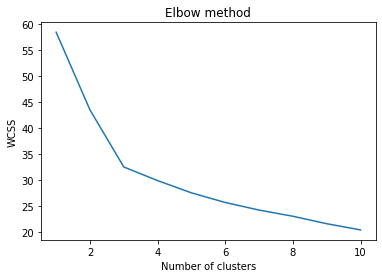

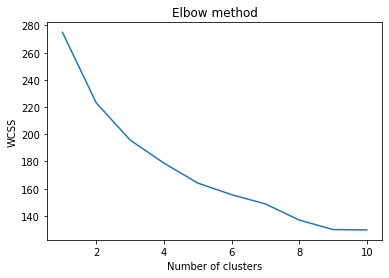

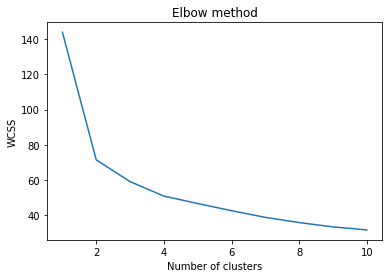

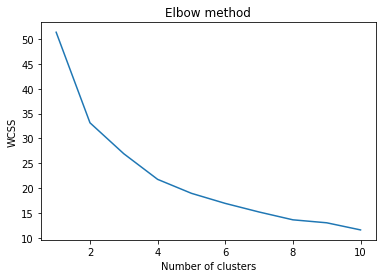

In [21]:
df_1=[wisconsion_1,hepatitis_1,ILPD_1,Immunotherapy_1]


for df in df_1:
    elbow_clusters(df)
    


## Finding clusters

In [22]:
num_clusters=[(wisconsion_1,3),(hepatitis_1,2),(ILPD_1,3),(Immunotherapy_1,3)]

def clusters(df,n):
    #get the clusters for positive cases
    clusters_model=KMeans(n_clusters=n)
    clusters_model.fit(df)
    df["labels"]=clusters_model.predict(df)
    df["labels"]=df["labels"]+1
    
    return df

for dfc,m in num_clusters:
    clusters(dfc,m)


## Get the final data

In [23]:
wisconsion_C = pd.concat([wisconsion_1,wisconsion_0],axis=0)
wisconsion_C["labels"].fillna(0,inplace=True)

hepatitis_C = pd.concat([hepatitis_1,hepatitis_0],axis=0)
hepatitis_C["labels"].fillna(0,inplace=True)

ILPD_C = pd.concat([ILPD_1,ILPD_0],axis=0)
ILPD_C["labels"].fillna(0,inplace=True)

Immunotherapy_C = pd.concat([Immunotherapy_1,Immunotherapy_0],axis=0)
Immunotherapy_C["labels"].fillna(0,inplace=True)


## Plotting target variable before and after clusters for each datasets

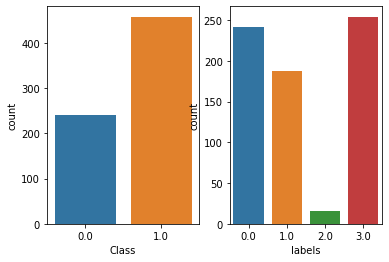

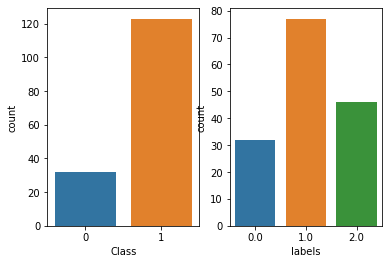

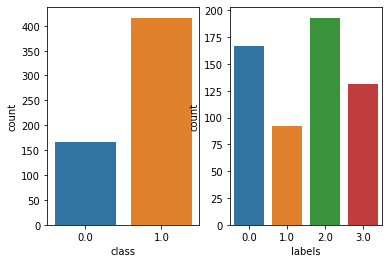

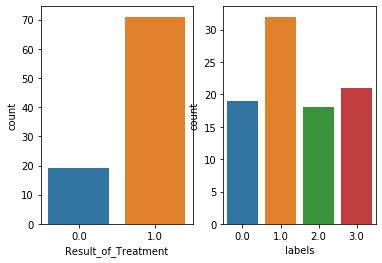

In [24]:
dfs=[(wisconsion_C,"Class","labels"),(hepatitis_C,"Class","labels"),(ILPD_C,"class","labels"),
     (Immunotherapy_C,"Result_of_Treatment","labels")]

for df,col1,col2 in dfs:
    ploting(df,col1,col2)

# Finding Evaluation metrices AFTER clustering

In [25]:
accuracyC=[]
precisionC=[]
recallC=[]
f1C=[]

avg_accuracyC = []
avg_precisionC = []
avg_rcallC  = []
avg_f1C = []

def accuracy_metrices_Clustering(df,tar_1,tar_2):
    for name,model in models:
        for i in range(10):
            random.seed(i)
            X_trainC, X_testC, y_trainC, y_testC = train_test_split(df.drop([tar_1,tar_2], 1), df[tar_2], test_size = .2) #split the data    
            model.fit(X_trainC, y_trainC)
            predicted = model.predict(X_testC)
            predicted= np.where((predicted >=1),1,predicted)
            y_testC=np.where((y_testC >=1) ,1,y_testC)
            accuracyC.append(sum(predicted==y_testC)/len(predicted))
            precisionC.append(precision_score(y_testC, predicted,average="binary"))
            recallC.append(recall_score(y_testC, predicted,average="binary"))
            f1C.append(f1_score(y_testC, predicted,average="binary"))

        avg_accuracyC.append((name,sum(accuracyC)/len(accuracyC)))
        avg_precisionC.append((name,sum(precisionC)/len(precisionC)))
        avg_rcallC.append((name,sum(recallC)/len(recallC)))
        avg_f1C.append((name,sum(f1C)/len(f1C)))
            

        


In [26]:
dfs=[(wisconsion_C,"Class","labels"),(hepatitis_C,"Class","labels"),(ILPD_C,"class","labels"),
     (Immunotherapy_C,"Result_of_Treatment","labels")]

for df,col1,col2 in dfs:
    accuracy_metrices_Clustering(df,col1,col2)

In [27]:
cluster_metrices=pd.concat([pd.DataFrame(avg_accuracyC),pd.DataFrame(avg_precisionC)[1],pd.DataFrame(avg_rcallC)[1],pd.DataFrame(avg_f1C)[1]],1)
cluster_metrices.columns=['model2','accuracy_w_clustering','precision_w_clustering','recall_w_clustering','f1_w_clustering'] 
final_clusters=pd.concat([cluster_metrices,metrices],1)
final_clusters

,model2,accuracy_w_clustering,precision_w_clustering,recall_w_clustering,f1_w_clustering,model,accuracy,precision,recall,f1
0,LR,0.964286,0.974632,0.970477,0.972473,LR,0.966429,0.967353,0.981124,0.974071
1,LDA,0.959643,0.961754,0.977684,0.969446,LDA,0.964643,0.963273,0.982658,0.972707
2,KNN,0.962857,0.968681,0.975358,0.971789,KNN,0.967619,0.968616,0.981940,0.975047
3,CART,0.958393,0.965079,0.972031,0.968328,CART,0.961071,0.963532,0.978185,0.970593
4,RF,0.957714,0.967560,0.968187,0.967613,RF,0.962714,0.967754,0.976251,0.971756
5,NB,0.954643,0.963098,0.968584,0.965499,NB,0.962976,0.970867,0.973209,0.971775
6,SVM,0.956633,0.966812,0.967754,0.966946,SVM,0.962041,0.974694,0.967785,0.970853
7,LR,0.940683,0.956676,0.960577,0.957998,LR,0.949044,0.966256,0.961947,0.963421
8,LDA,0.926126,0.946204,0.955291,0.949646,LDA,0.938218,0.958465,0.957037,0.957037
9,KNN,0.916094,0.938826,0.950909,0.943351,KNN,0.915687,0.937036,0.955831,0.944311


## Another approach to find accuracy manually using confusion matrix

In [28]:
accuracyM=[]

avg_accuracyM = []

def accuracy_metrices_M(df,tar_1):
    for name,model in models:
        for i in range(10):
            random.seed(i)
            X_train, X_test, y_train, y_test = train_test_split(df.drop([tar_1], 1), df[tar_1], test_size = .2) #split the data    
            model.fit(X_train, y_train)
            predicted = model.predict(X_test)
            cm=confusion_matrix(y_test,predicted) # Define confusion matrix
            
            tp_and_fn = cm.sum(1)
            tp_and_fp = cm.sum(0)
            tp = cm.diagonal()
            
            acc=(len(predicted)-(tp_and_fn[0]+tp_and_fp[0]-2*tp[0]))/len(predicted) # calculate accuracy
            accuracyM.append(acc)

        avg_accuracyM.append((name,sum(accuracyM)/len(accuracyM)))
    

In [29]:
dfs=[(wisconsion,"Class"),(hepatitis,"Class"),(ILPD,"class"),(Immunotherapy,"Result_of_Treatment")]
for df,name in dfs:
    accuracy_metrices_M(df,name)

accuracyM=pd.DataFrame(avg_accuracyM)
accuracyM.columns=["Model","Accuracy"]

In [30]:
accuracyCM=[]

avg_accuracyCM = []

def accuracy_metrices_CM(df,tar_1,tar_2):
    for name,model in models:
        for i in range(10):
            random.seed(i)

            X_trainC, X_testC, y_trainC, y_testC = train_test_split(df.drop([tar_1,tar_2], 1), df[tar_2], test_size = .2) #split the data    
            model.fit(X_trainC, y_trainC)
            predicted = model.predict(X_testC)
            cm=confusion_matrix(y_testC,predicted)
            tp_and_fn = cm.sum(1)
            tp_and_fp = cm.sum(0)
            tp = cm.diagonal()
            
            acc=(len(predicted)-(tp_and_fn[0]+tp_and_fp[0]-2*tp[0]))/len(predicted)
            accuracyCM.append(acc)
            
        avg_accuracyCM.append((name,sum(accuracyCM)/len(accuracyCM)))
  
            

In [31]:
dfs=[(wisconsion_C,"Class","labels"),(hepatitis_C,"Class","labels"),(ILPD_C,"class","labels"),
     (Immunotherapy_C,"Result_of_Treatment","labels")]

for df,col1,col2 in dfs:
    accuracy_metrices_CM(df,col1,col2)

In [32]:
accuracyCM=pd.DataFrame(avg_accuracyCM)
accuracyCM.columns=["Model","Accuracy_C"]

In [33]:
final_metrics=pd.concat([accuracyCM,accuracyM],1)
final_metrics

,Model,Accuracy_C,Model,Accuracy
0,LR,0.965000,LR,0.970000
1,LDA,0.953214,LDA,0.962143
2,KNN,0.959048,KNN,0.965952
3,CART,0.955714,CART,0.961071
4,RF,0.957000,RF,0.962714
5,NB,0.956310,NB,0.962024
6,SVM,0.957857,SVM,0.962347
7,LR,0.944173,LR,0.951328
8,LDA,0.929946,LDA,0.937739
9,KNN,0.916952,KNN,0.928159
